<a href="https://colab.research.google.com/github/mnikolop/CaseForJobtech/blob/master/KarolinskaTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 

Python is an interpreted, high-level, general-purpose programming language.    
Can be used for almost anything.   
We are using it for data analysis.    
Main library used in data analysis is pandas.   
There used to be 2 version python2 (or python) and python 3. Since January 1st Python 2 has been depricated so we are only using python 3.

## Main Resource
- [python](https://www.python.org/)
- [stackoverflow](https://stackoverflow.com/)
- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)

## Editors

Editors can be IDEs, text editors or notbooks.
- [Anaconda]: deployment environment
  - [Jupyter]: notebook
- [VS Code]: text editor
- [PyCharm]: IDE
- [Google Colab]: notebook




It is possible to run command lines from a notebook.
Some notebooks also allow other languages to be mixed in as long as they arein seperate cells and you specify the language (and of course it is suported).

In [1]:
# Install libraries
!pip install gapminder
!pip install -U -q PyDrive

In [0]:
#Import libraries
import numpy as np #basic scientific computation 
import pandas as pd #for data science
from gapminder import gapminder #dataset
import matplotlib.pyplot as plt #ploting 
import seaborn as sns; sns.set_style("darkgrid") #ploting
my_dpi=96 #dots per inch. Used in the size of the plots

#Libraries for reading from the drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Let's print some basic stats of our data.

In [14]:
print("the first 5 lines of the dataframe are \n" , gapminder.head())
print("the basic statistics of the dataframe are \n" , gapminder.describe())
print("the data types of the dataframe are \n" , gapminder.dtypes)
print("the data types of teh dataframe are (plus sparsity) \n" , gapminder.ftypes)

the first 5 lines of the dataframe are 
        country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106
the basic statistics of the dataframe are 
              year      lifeExp           pop      gdpPercap
count  1704.00000  1704.000000  1.704000e+03    1704.000000
mean   1979.50000    59.474439  2.960121e+07    7215.327081
std      17.26533    12.917107  1.061579e+08    9857.454543
min    1952.00000    23.599000  6.001100e+04     241.165877
25%    1965.75000    48.198000  2.793664e+06    1202.060309
50%    1979.50000    60.712500  7.023596e+06    3531.846989
75%    1993.25000    70.845500  1.958522e+07    9325.462346
max    2007.00000    82.603000  1.318683e+09  113523.132900
the

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.ftypes is deprecated and will be removed in a future version. Use DataFrame.dtypes instead.
  after removing the cwd from sys.path.


In [0]:
df = gapminder 
df.year = pd.to_datetime(df.year, format='%Y').dt.year
df['continent']=pd.Categorical(df['continent'])

In [16]:
df.head() 

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [17]:
link = 'https://drive.google.com/open?id=1bD8Q_S1zvRinbVPGMjkS87rkcM13FlWMZ9YSr8dsYbg' # The shareable link
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dtp3_immunized_percent_of_one_year_olds.csv')  
df3 = pd.read_csv('dtp3_immunized_percent_of_one_year_olds.csv')

1bD8Q_S1zvRinbVPGMjkS87rkcM13FlWMZ9YSr8dsYbg


FileNotDownloadableError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


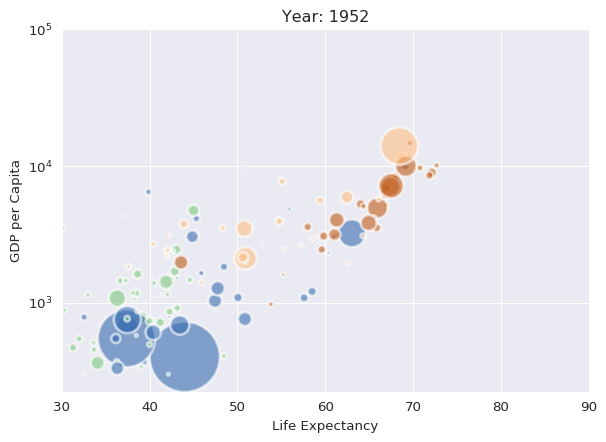

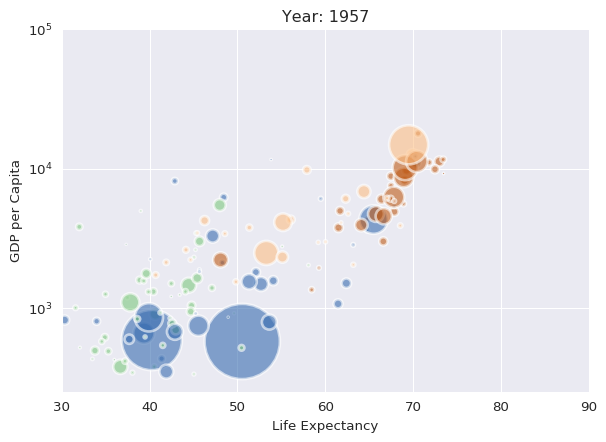

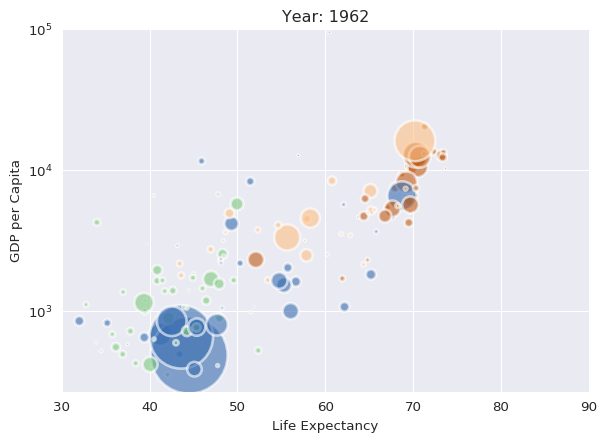

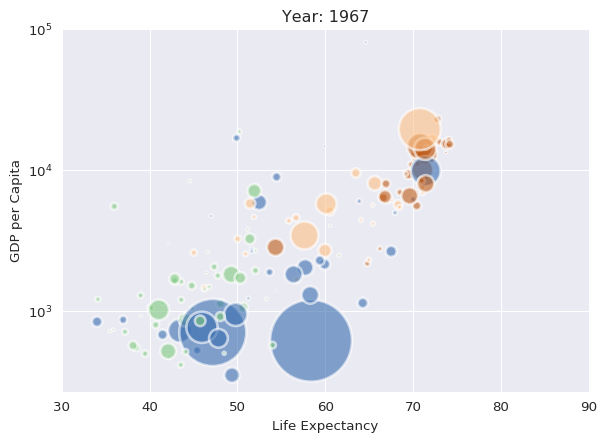

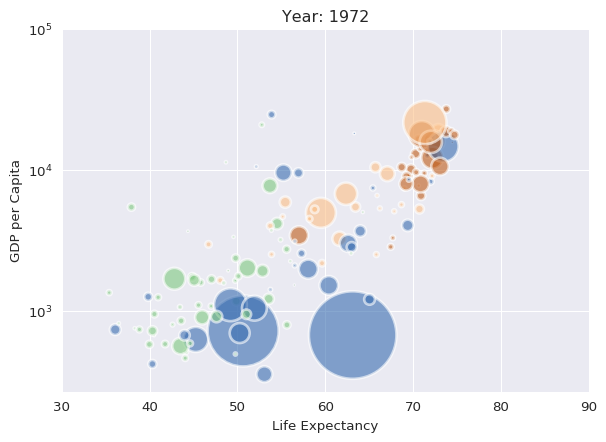

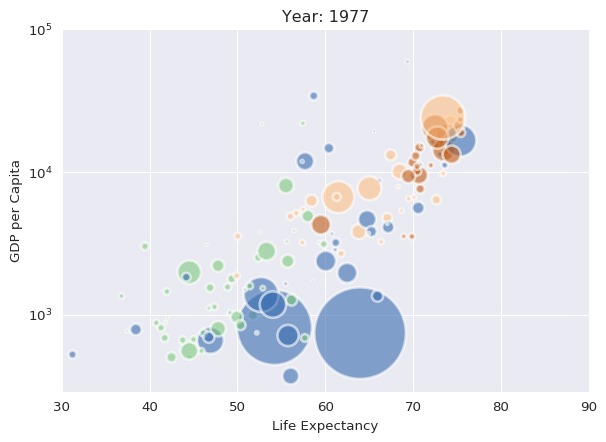

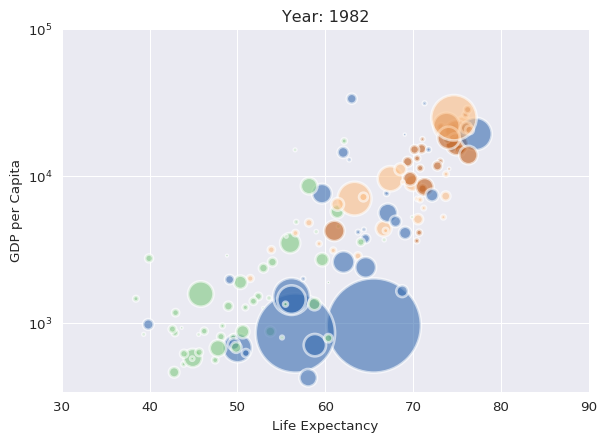

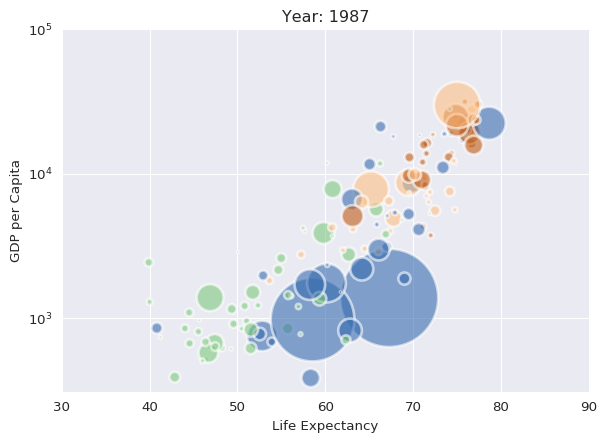

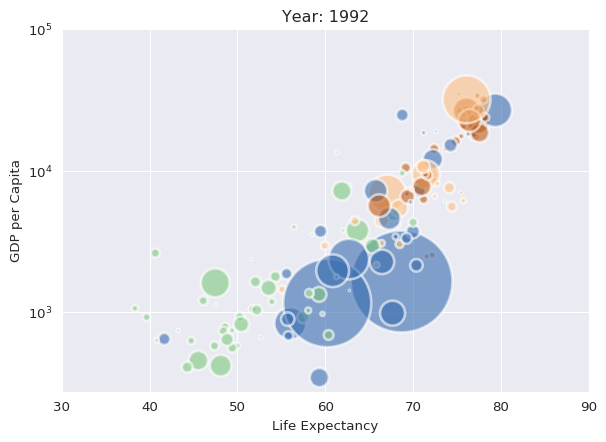

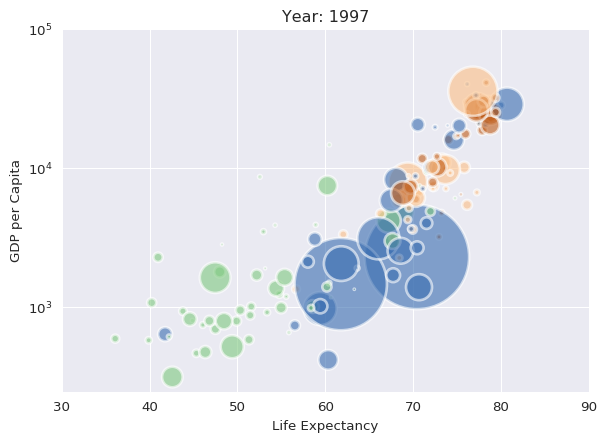

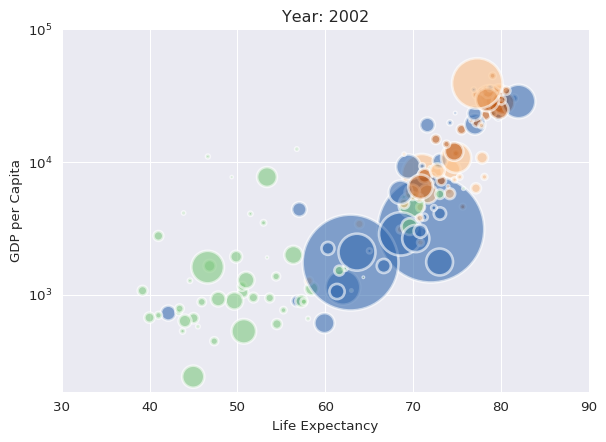

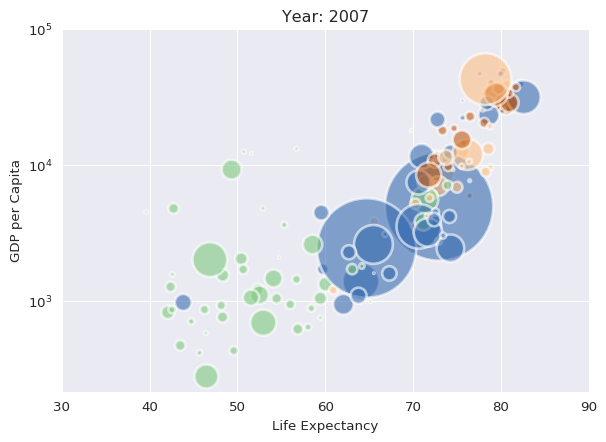

In [18]:
# graph data
for i in df.year.unique():
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
  tmp=df[ df.year == i ]
  plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
  plt.yscale('log')
  plt.xlabel("Life Expectancy")
  plt.ylabel("GDP per Capita")
  plt.title("Year: "+str(i) )
  plt.ylim(0,100000)
  plt.xlim(30, 90)


In [0]:
# TODO import data for vaccines

In [0]:
# TODO do some filter combinations and stuff

In [0]:
# TODO graph data together

In [0]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])
 
# For each year:
for i in data.year.unique():
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
  tmp=data[ data.year == i ]
  plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)
  plt.yscale('log')
  plt.xlabel("Life Expectancy")
  plt.ylabel("GDP per Capita")
  plt.title("Year: "+str(i) )
  plt.ylim(0,100000)
  plt.xlim(30, 90)

  filename='Gapminder_step'+str(i)+'.png'
  plt.savefig(filename, dpi=96)
  plt.gca()


# References
- [Gapminder]
- https://python-graph-gallery.com/341-python-gapminder-animation/
- 
